In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
def genetic_tournament(fitness, population0, crossover_rate, mutation_rate, iterations, debug = False, plot = False):
    
    # initial values
    population = population0
    
    # track values
    averages = []
    bests = []
    
    # iterate
    for i in range(iterations):
        
        # build next generation
        new_population = []
        for j in range(len(population) // 2):
            
            # choose parent1 via tournament
            parent1_a = random.choice(population)
            parent1_b = random.choice(population)
            parent1 = parent1_a if fitness(parent1_a) > fitness(parent1_b) else parent1_b
            
            # choose parent2 via tournament
            parent2_a = random.choice(population)
            parent2_b = random.choice(population)
            parent2 = parent2_a if fitness(parent2_a) > fitness(parent2_b) else parent2_b
            
            # children might just be copies...
            child1 = parent1.copy()
            child2 = parent2.copy()
            
            # ... or might be a crossover of parents
            if random.random() < crossover_rate:
                l = random.choice(range(len(child1)))
                child1, child2 = child1[:l] + child2[l:], child2[:l] + child1[l:]
            
            # mutate
            child1 = [((1 - gene) if random.random() < mutation_rate else gene) for gene in child1]
            child2 = [((1 - gene) if random.random() < mutation_rate else gene) for gene in child2]
            
            # append the children to the new generation
            new_population += [child1, child2]
        
        # update
        population = new_population
        
        # track values
        fitnesses = [fitness(individual) for individual in population]
        average = sum(fitnesses) / len(fitnesses)
        best = max(fitnesses)
        averages.append(average)
        bests.append(best)
        
        # debug if specified
        if debug:
            print('--------------------')
            print(f'Iteration: {i}')
            print(f'Average: {average:.6g}')
            print(f'Best: {best:.3g}')
    
    # plot if specified
    if plot:
        plt.figure()
        plt.plot(averages, label = 'Average')
        plt.plot(bests, label = 'Best')
        plt.grid(True)
        plt.legend()
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
    
    return population

--------------------
Iteration: 0
Average: 0.231722
Best: 3.41
--------------------
Iteration: 1
Average: 0.582916
Best: 4.91
--------------------
Iteration: 2
Average: 0.648381
Best: 4.91
--------------------
Iteration: 3
Average: 0.698013
Best: 3.41
--------------------
Iteration: 4
Average: 0.873429
Best: 3.48
--------------------
Iteration: 5
Average: 1.71574
Best: 4.34
--------------------
Iteration: 6
Average: 2.04427
Best: 4.34
--------------------
Iteration: 7
Average: 2.76781
Best: 4.34
--------------------
Iteration: 8
Average: 2.86344
Best: 4.34
--------------------
Iteration: 9
Average: 3.31239
Best: 4.34
--------------------
Iteration: 10
Average: 3.50841
Best: 4.34
--------------------
Iteration: 11
Average: 3.69531
Best: 4.9
--------------------
Iteration: 12
Average: 3.98263
Best: 4.9
--------------------
Iteration: 13
Average: 4.00392
Best: 4.9
--------------------
Iteration: 14
Average: 3.90309
Best: 5.01
--------------------
Iteration: 15
Average: 3.85346
Best: 5.01


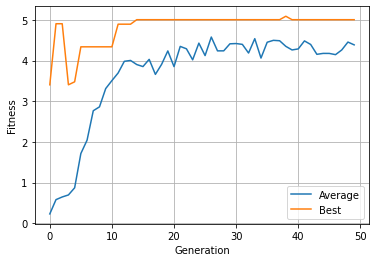

In [3]:
# example usage: knapsack problem

n_items = 20
n_population = 50

values = [random.random() for i in range(n_items)]
weights = [random.random() for i in range(n_items)]

def fitness(individual):
    value = sum([value * keep for value, keep in zip(values, individual)])
    weight = sum([weight * keep for weight, keep in zip(weights, individual)])
    return value if weight < 3.0 else 0

population0 = [[random.choice([0, 1]) for j in range(n_items)] for i in range(n_population)]
population = genetic_tournament(fitness, population0, 0.5, 0.01, 50, debug = True, plot = True)